In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('spam-ham.csv')

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

## 1. Data Cleaning


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [8]:
df.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],inplace = True)

In [9]:
df.sample(5)

,v1,v2
2400,ham,Hi! This is Roger from CL. How are you?
382,ham,Hey leave it. not a big deal:-) take care.
3313,ham,Oh gei. That happend to me in tron. Maybe ill ...
1541,ham,Do u konw waht is rael FRIENDSHIP Im gving yuo...
3303,ham,IM GONNAMISSU SO MUCH!!I WOULD SAY IL SEND U A...


In [10]:
df.rename(columns = {'v1':'target' , 'v2':'text'},inplace = True)
df.sample(5)

,target,text
3271,ham,"MOON has come to color your dreams, STARS to m..."
4401,ham,Good FRIENDS CaRE for each Other.. CLoSE Frien...
5506,ham,God's love has no limit. God's grace has no me...
4278,spam,URGENT. Important information for 02 user. Tod...
7,ham,As per your request 'Melle Melle (Oru Minnamin...


## APPLYING LABEL ENCODING

In [11]:
from sklearn.preprocessing import LabelEncoder
encoder  = LabelEncoder()

In [12]:
df['target'] = encoder.fit_transform(df['target'])

In [13]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [15]:
df.duplicated().sum()

np.int64(403)

In [16]:
df = df.drop_duplicates(keep ='first')

In [17]:
df.duplicated().sum()

np.int64(0)

In [18]:
df.shape

(5169, 2)

## 2. EDA

In [19]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

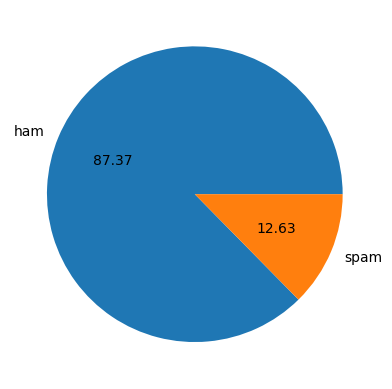

In [20]:
plt.pie(df['target'].value_counts(), labels = ['ham', 'spam'],autopct = "%0.2f")
plt.show()

In [21]:
# Data is clearly imbalanced

In [22]:
import nltk 

In [23]:
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     /home/yashsinghrawat/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/yashsinghrawat/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [24]:
df['num_char']= df['text'].apply(len)

In [25]:
df.head()

,target,text,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [26]:
# Number of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [27]:
df.head()

,target,text,num_char,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [28]:
# Number of sentences

In [29]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [30]:
df.head()

,target,text,num_char,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [31]:
df[['num_char','num_words','num_sentences']].describe()

,num_char,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.923776,18.456761,1.966531
std,58.174846,13.325633,1.449833
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [32]:
#CHecking for "ham" ( not spam )
df [df['target'] == 0][['num_char','num_words','num_sentences']].describe()

,num_char,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.456820,17.123782,1.820195
std,56.356802,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [33]:
# spam
df [df['target'] == 1][['num_char','num_words','num_sentences']].describe()

,num_char,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.479326,27.675345,2.978560
std,30.014336,7.011513,1.493185
min,13.000000,2.000000,1.000000
25%,131.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


In [34]:
import seaborn as sns

<Axes: xlabel='num_char', ylabel='Count'>

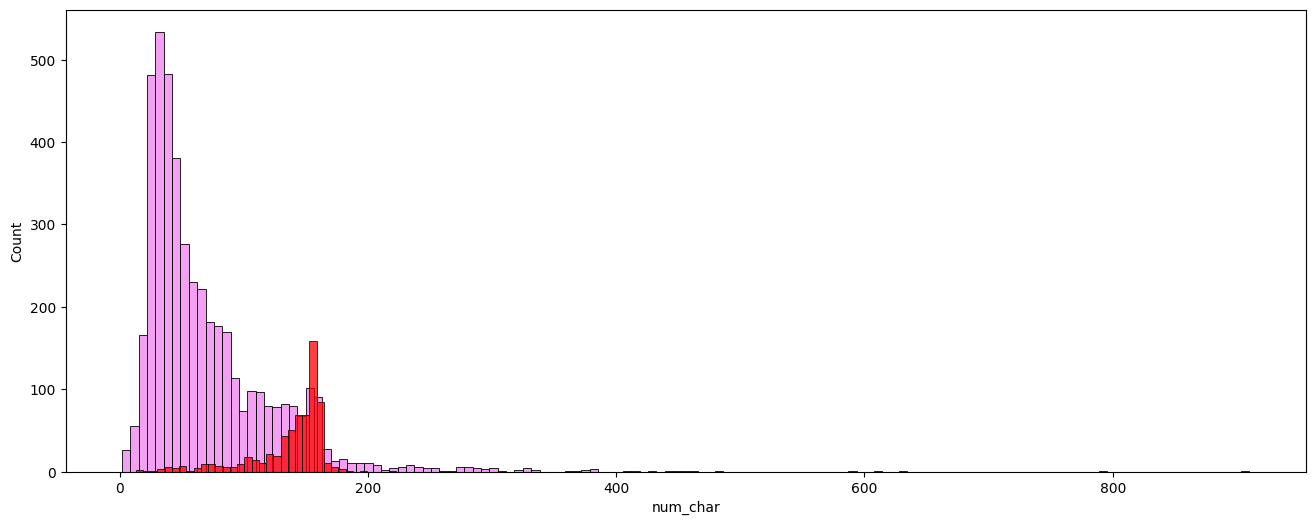

In [35]:
plt.figure(figsize = (16,6))
sns.histplot(df[df['target'] == 0]['num_char'],color = 'violet')
sns.histplot(df[df['target'] == 1]['num_char'],color = 'red')

<Axes: xlabel='num_words', ylabel='Count'>

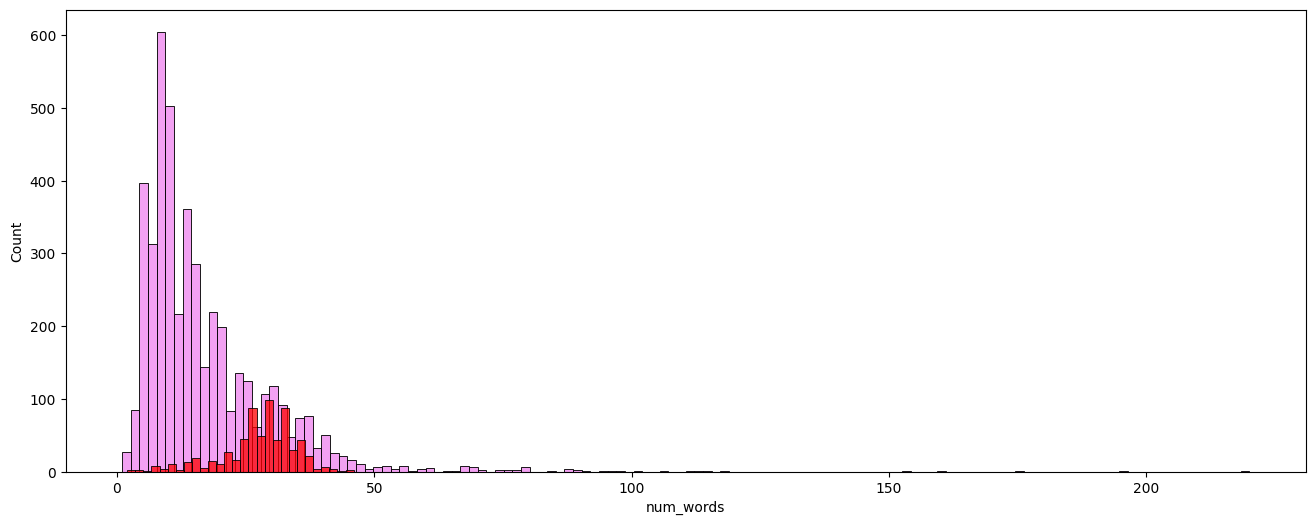

In [36]:
plt.figure(figsize = (16,6))
sns.histplot(df[df['target'] == 0]['num_words'],color = 'violet')
sns.histplot(df[df['target'] == 1]['num_words'],color = 'red')

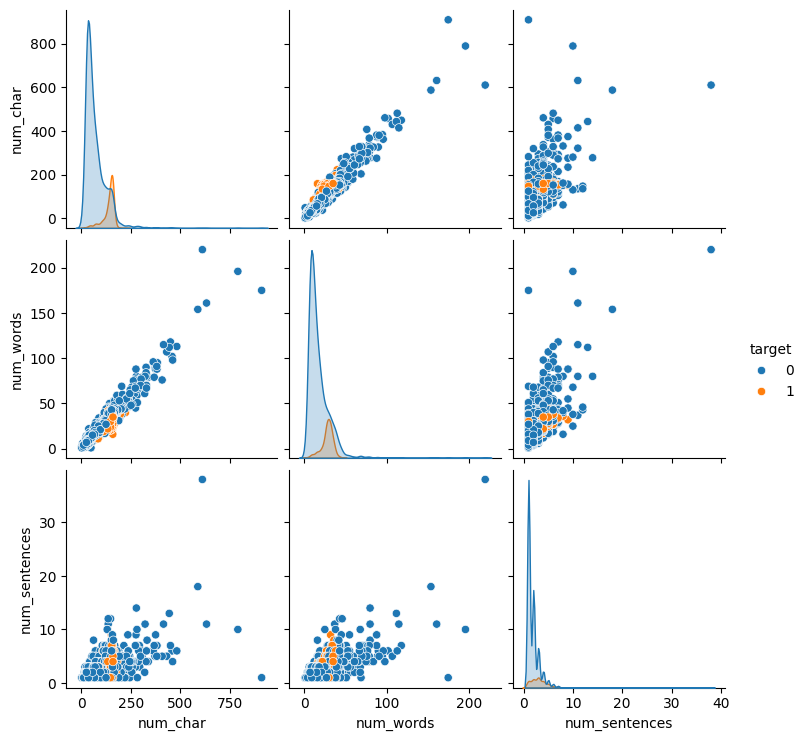

In [37]:
 sns.pairplot(df,hue ='target')

In [38]:
numeric_df = df.select_dtypes(include= 'number')

correlation = numeric_df.corr()

<Axes: >

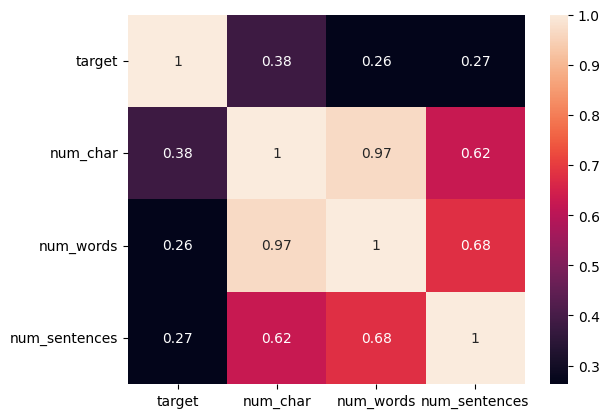

In [39]:
sns.heatmap(correlation, annot = True)

## 3. Data Preprocessing

In [40]:
# Lowercase 
# Tokenize
# Remove special characters , punctuation marks
# Remove stop words -> is , of ,the
# Stemming -> danced , dance ,dances  = dance

In [41]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/yashsinghrawat/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [42]:
STOPWORDS = stopwords.words('english')

In [43]:
import string
Punctuation  = string.punctuation

In [44]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loved')

'love'

In [45]:
def transform_text(text):

    text = text.lower()
    text =  nltk.word_tokenize(text)

    y = []
    for i in text :
        if i.isalnum():
          y.append(i)

    text = y[:]
    y.clear()

    for i in text : 
        if i not in STOPWORDS and i not in Punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text :
        y.append(ps.stem(i))

    return " ".join(y)



In [46]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [47]:
df['text'][2000]

"But i'll b going 2 sch on mon. My sis need 2 take smth."

In [48]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [49]:
df['transformed_text'] = df['text'].apply(transform_text) 

In [50]:
df.head()

,target,text,num_char,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [51]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [52]:
# Generate the word cloud class

from wordcloud import WordCloud 
wc = WordCloud(width = 500 , height = 500 , min_font_size = 10 , background_color = 'black')


In [53]:
spam_wc = wc.generate(df[df['target' ] == 1]['transformed_text'].str.cat(sep = " " ))

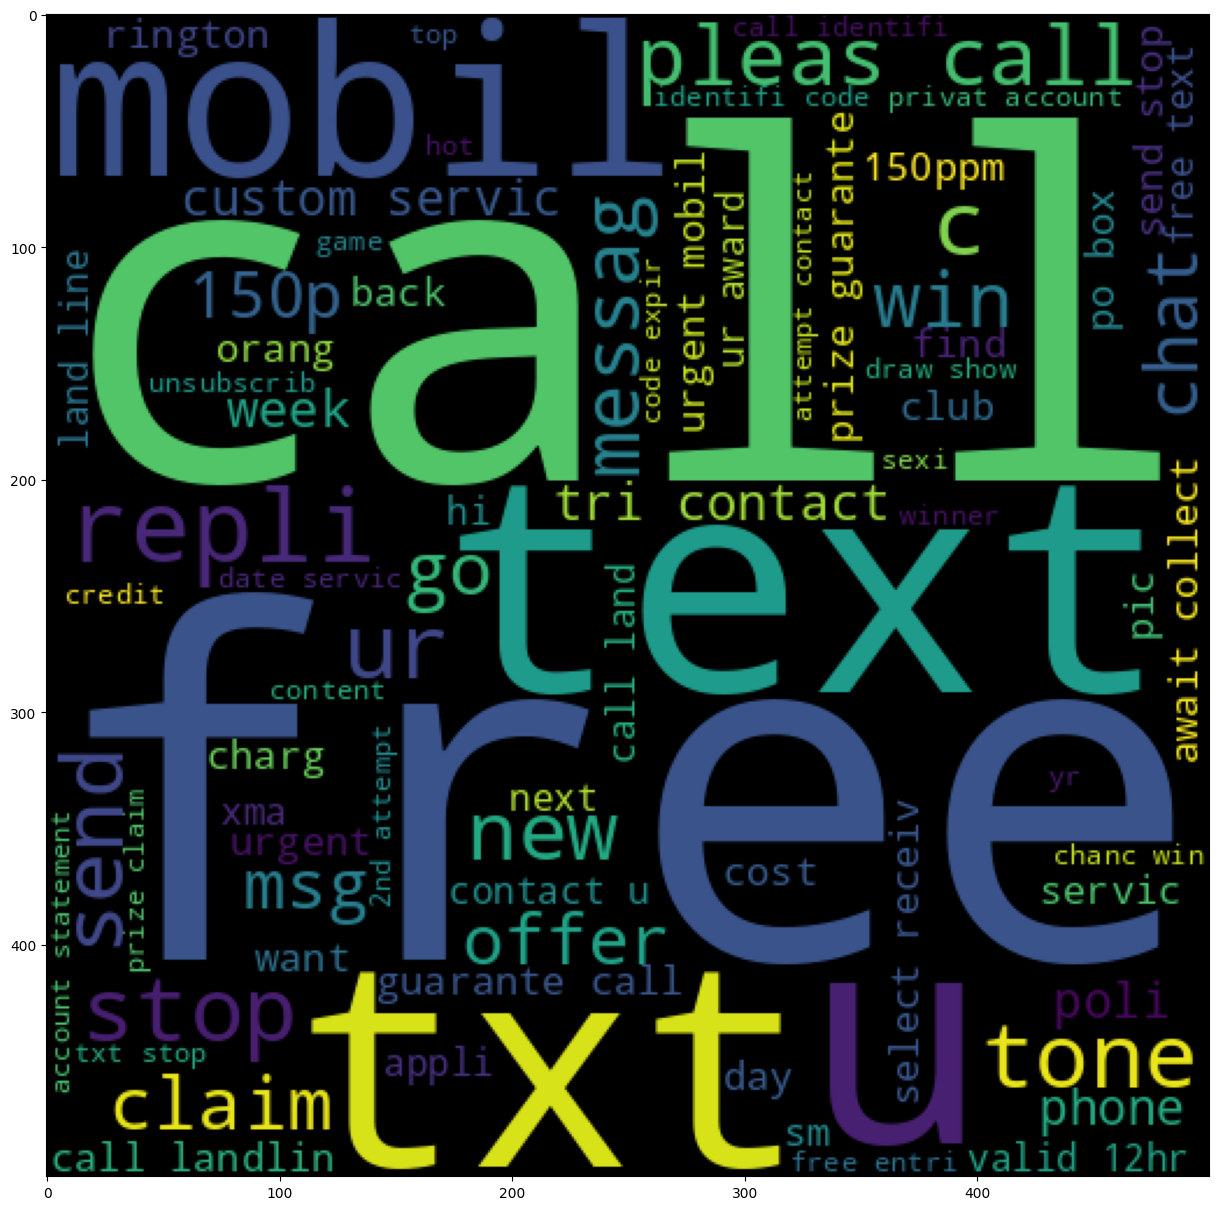

In [54]:
plt.figure(figsize = (15,18))
plt.imshow(spam_wc)

In [55]:
ham_wc = wc.generate(df[df['target' ] == 0]['transformed_text'].str.cat(sep = " " ))

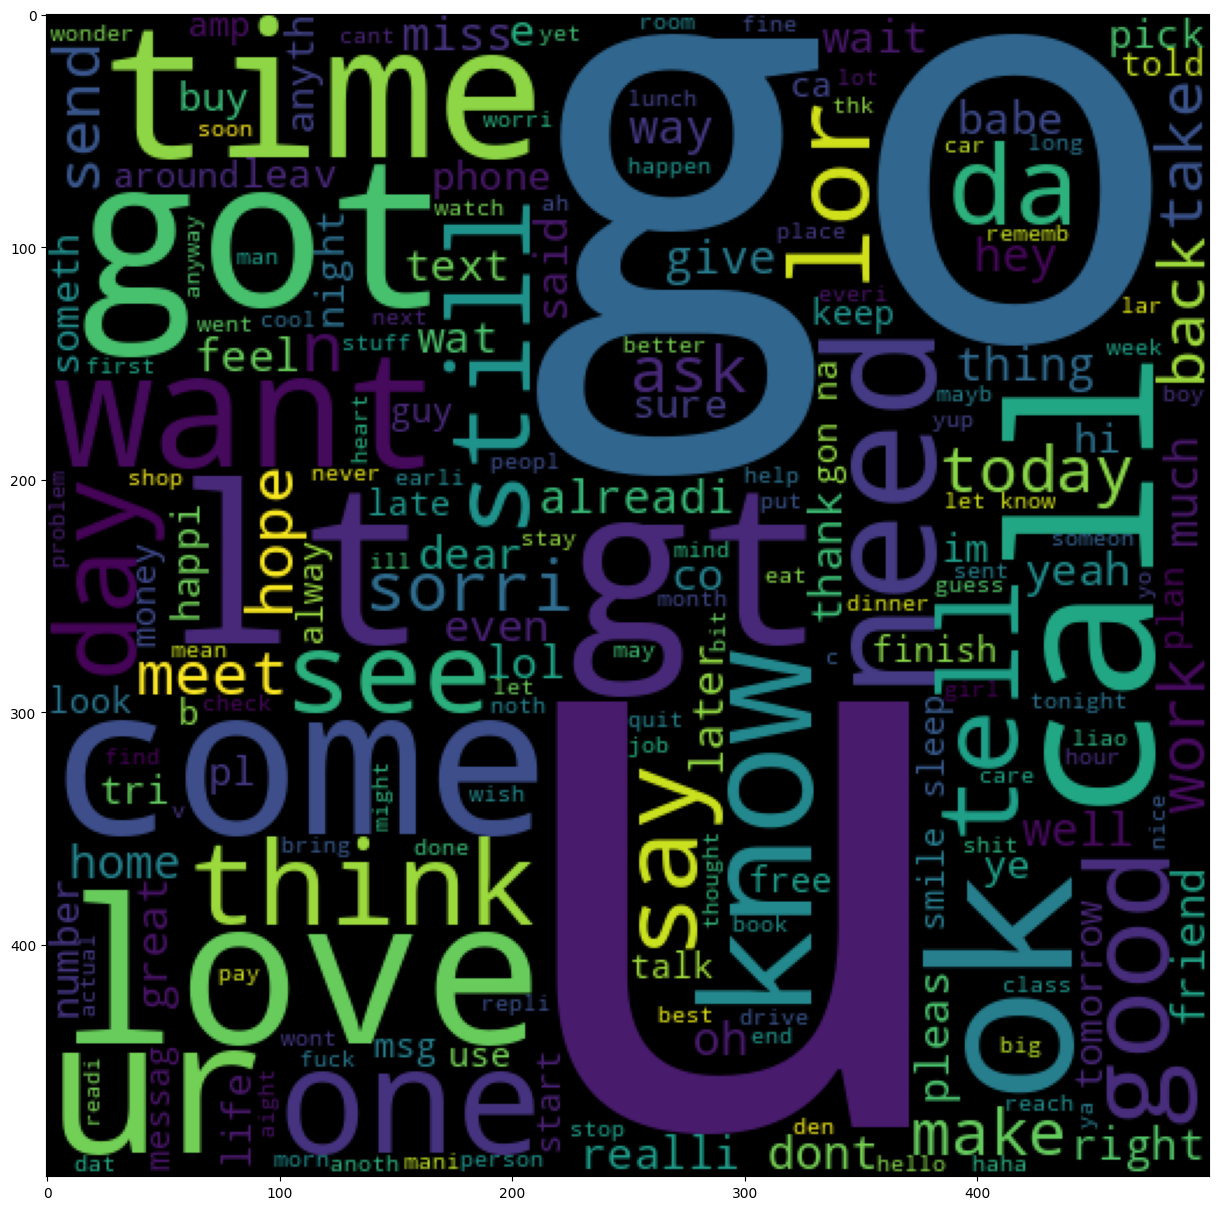

In [56]:
plt.figure(figsize = (15,18))
plt.imshow(ham_wc)

In [57]:
# Spam and ham top 30 words
df.head()

,target,text,num_char,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [58]:
# Initialised an empty list , got all the words of the spam and then added them into
# an empty list individually
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for words in msg.split():
        spam_corpus.append(words)

In [59]:
len(spam_corpus)

9941

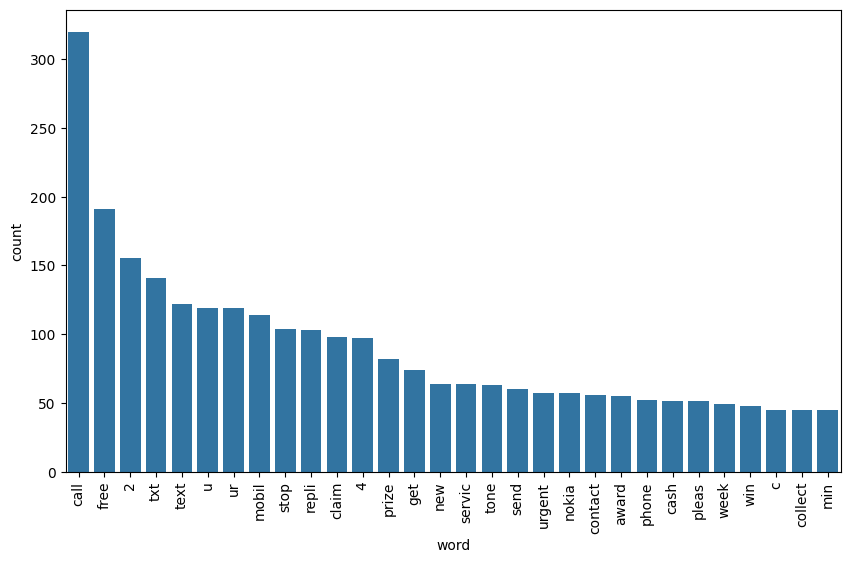

In [60]:
from collections import Counter 

common_words = Counter(spam_corpus).most_common(30)
df_common = pd.DataFrame(common_words, columns = ['word','count'])

plt.figure(figsize = (10, 6))
sns.barplot(x = 'word', y = 'count', data = df_common)

plt.xticks(rotation = 'vertical')

plt.show()


In [61]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for words in msg.split():
        ham_corpus.append(words)

In [62]:
len(ham_corpus)

35305

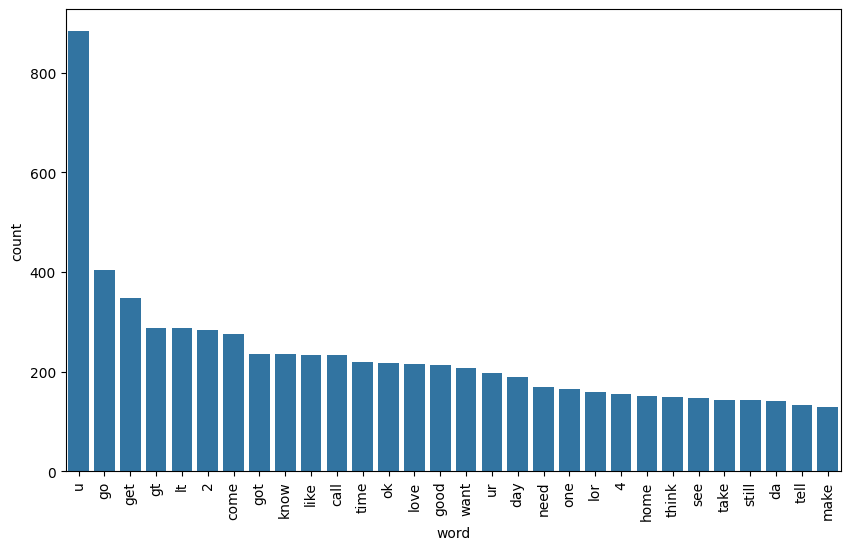

In [63]:
from collections import Counter 

common_words2 = Counter(ham_corpus).most_common(30)
df_common = pd.DataFrame(common_words2, columns = ['word','count'])

plt.figure(figsize = (10, 6))
sns.barplot(x = 'word', y = 'count', data = df_common)

plt.xticks(rotation = 'vertical')

plt.show()

## Model Building 

In [64]:
# Using Naive Bayes  Algo ( Textual Data or Categorical Data) 

In [65]:
df.head()

,target,text,num_char,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


### Using Bag of Words 

In [66]:
# Vectorize == >  textual data to vectors
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [67]:
x = cv.fit_transform(df['transformed_text']).toarray() # sparse array to dense array

In [68]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(5169, 6677))

In [69]:
x.shape

(5169, 6677)

In [70]:
y = df['target'].values

In [71]:
y

array([0, 0, 1, ..., 0, 0, 0], shape=(5169,))

In [72]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state=2)


In [73]:
from sklearn.naive_bayes import GaussianNB , MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [74]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [75]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)

In [76]:
acc1 = accuracy_score(y_test, y_pred1)
conf1 = confusion_matrix(y_test,y_pred1)
prec1 = precision_score(y_test,y_pred1)

print(acc1)
print(conf1)
print(prec1)

0.8781431334622823
[[790 106]
 [ 20 118]]
0.5267857142857143


In [77]:
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)

acc2 = accuracy_score(y_test, y_pred2)
conf2 = confusion_matrix(y_test,y_pred2)
prec2 = precision_score(y_test,y_pred2)

print(acc2)
print(conf2)
print(prec2)

0.965183752417795
[[872  24]
 [ 12 126]]
0.84


In [78]:
# FOR IMBALANCED DATASET WE LOOK MORE AT PRECISION RATHER THAN ACCURACY


In [79]:
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)

acc3 = accuracy_score(y_test, y_pred3)
conf3 = confusion_matrix(y_test,y_pred3)
prec3 = precision_score(y_test,y_pred3)

print(acc3)
print(conf3)
print(prec3)

0.971953578336557
[[894   2]
 [ 27 111]]
0.9823008849557522


In [80]:
# Here we get the best accuracy and best precision using BNB

### Using Tf-idf 

In [81]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features = 3000)

In [82]:
x_tf = tfidf.fit_transform(df['transformed_text']).toarray()

In [83]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_tf = scaler.fit_transform(x_tf)

In [84]:
x_tf.shape

(5169, 3000)

In [85]:
y_tf = df['target'].values

In [86]:
y_tf

array([0, 0, 1, ..., 0, 0, 0], shape=(5169,))

In [87]:
x_tf_train, x_tf_test , y_tf_train , y_tf_test = train_test_split(x_tf,y_tf,test_size = 0.2, random_state = 2)
x_tf_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(4135, 3000))

In [88]:
# Gaussian NB using TF-IDF
gnb.fit(x_tf_train,y_tf_train)
y_pred_1_tf = gnb.predict(x_tf_test)

acc1_tf =  accuracy_score(y_tf_test, y_pred_1_tf)
conf1_tf = confusion_matrix(y_tf_test,y_pred_1_tf)
prec1_tf = precision_score(y_tf_test,y_pred_1_tf)

print(acc1_tf)
print(conf1_tf)
print(prec1_tf)

0.8733075435203095
[[782 114]
 [ 17 121]]
0.5148936170212766


In [89]:
# Multinomial NB using TF-IDF
mnb.fit(x_tf_train,y_tf_train)
y_pred_2_tf = mnb.predict(x_tf_test)

acc2_tf =  accuracy_score(y_tf_test, y_pred_2_tf)
conf2_tf = confusion_matrix(y_tf_test,y_pred_2_tf)
prec2_tf = precision_score(y_tf_test,y_pred_2_tf)

print(acc2_tf)
print(conf2_tf)
print(prec2_tf)

0.9787234042553191
[[889   7]
 [ 15 123]]
0.9461538461538461


In [90]:
# Bernoulli NB using TF-IDF
bnb.fit(x_tf_train,y_tf_train)
y_pred_3_tf = bnb.predict(x_tf_test)

acc3_tf =  accuracy_score(y_tf_test, y_pred_3_tf)
conf3_tf = confusion_matrix(y_tf_test,y_pred_3_tf)
prec3_tf = precision_score(y_tf_test,y_pred_3_tf)

print(acc3_tf)
print(conf3_tf)
print(prec3_tf)

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


### WE WILL PREFER MNB OVER BNF (tf_idf) BECAUSE WE LOOK AT PRECISION RATHER THAN ACCURACY 
### (FOR IMBALANCED DATASET)

## Now we will Apply difference machine learning techniques to get the most optimized result

In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [92]:
svc = SVC(kernel = 'sigmoid',gamma = 1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth= 5)
lrc = LogisticRegression(solver = 'liblinear',penalty='l1')
rfc = RandomForestClassifier(n_estimators = 50 , random_state = 2)
abc = AdaBoostClassifier(n_estimators = 50 ,random_state = 2)
bc  = BaggingClassifier(n_estimators = 50 , random_state = 2)
etc = ExtraTreesClassifier(n_estimators = 50 , random_state = 2)
gbdt= GradientBoostingClassifier(n_estimators = 50 , random_state = 2 )

In [93]:
clfs = {

    'SVC' : svc,
    'KN'  : knc,
    'NB'  : mnb,
    'DT'  : dtc,
    'LR'  : lrc,
    'RF'  : rfc , 
    'AdaBoost' :abc,
    'BgC' : bc,
    'ETC' : etc,
    'GBDT': gbdt,
    
}

In [94]:
def train_classifier(clf,x_tf_train,y_tf_train , x_tf_test, y_tf_test ) :
    clf.fit(x_tf_train,y_tf_train)
    ypred = clf.predict(x_tf_test)
    accuracy = accuracy_score(y_tf_test, ypred)
    precision = precision_score(y_tf_test,ypred)

    return accuracy,precision

In [95]:
train_classifier(svc, x_tf_train,y_tf_train,x_tf_test, y_tf_test)

(0.9671179883945842, 0.9333333333333333)

In [96]:
import warnings 
warnings.filterwarnings('ignore')
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy , current_precision = train_classifier(clf,x_tf_train,y_tf_train,x_tf_test,y_tf_test)

    print("For ",name)
    print("Accuracy : ",current_accuracy)
    print("Precision : ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy :  0.9671179883945842
Precision :  0.9333333333333333
For  KN
Accuracy :  0.9061895551257253
Precision :  1.0
For  NB
Accuracy :  0.9787234042553191
Precision :  0.9461538461538461
For  DT
Accuracy :  0.9313346228239845
Precision :  0.8383838383838383
For  LR
Accuracy :  0.9671179883945842
Precision :  0.9642857142857143
For  RF
Accuracy :  0.971953578336557
Precision :  0.9658119658119658
For  AdaBoost
Accuracy :  0.9216634429400387
Precision :  0.8202247191011236
For  BgC
Accuracy :  0.9593810444874274
Precision :  0.8636363636363636
For  ETC
Accuracy :  0.9787234042553191
Precision :  0.9754098360655737
For  GBDT
Accuracy :  0.9497098646034816
Precision :  0.9215686274509803


In [97]:
performance_df = pd.DataFrame({'Algorithm' : clfs.keys(), 'Accuracy' : accuracy_scores,'Precision' : precision_scores}).sort_values('Precision',ascending = False)

In [98]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.906190,1.000000
8,ETC,0.978723,0.975410
5,RF,0.971954,0.965812
4,LR,0.967118,0.964286
2,NB,0.978723,0.946154
0,SVC,0.967118,0.933333
9,GBDT,0.949710,0.921569
7,BgC,0.959381,0.863636
3,DT,0.931335,0.838384
6,AdaBoost,0.921663,0.820225


In [99]:
performance_df1 = pd.melt(performance_df, id_vars = 'Algorithm')
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.906190
1,ETC,Accuracy,0.978723
2,RF,Accuracy,0.971954
3,LR,Accuracy,0.967118
4,NB,Accuracy,0.978723
5,SVC,Accuracy,0.967118
6,GBDT,Accuracy,0.949710
7,BgC,Accuracy,0.959381
8,DT,Accuracy,0.931335
9,AdaBoost,Accuracy,0.921663


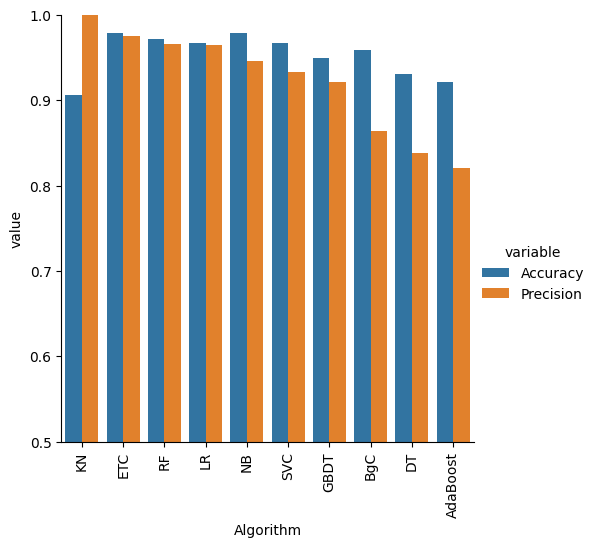

In [100]:
sns.catplot(x = 'Algorithm' , y = 'value',
            hue = 'variable' , data = performance_df1 , kind = 'bar',height = 5 )

plt.ylim(0.5,1.0)
plt.xticks(rotation = 'vertical')
plt.show()

In [101]:
# TRYING TO IMPROVE THE MODEL ( Naive Bayes)

# 1. Change the max_features parameter of Tfidf

temp_df = pd.DataFrame({'Algorithm' : clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores , 'Precision_max_ft_3000' : precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [102]:
performance_df.merge(temp_df, on = 'Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,KN,0.906190,1.000000,0.906190,1.000000
1,ETC,0.978723,0.975410,0.978723,0.975410
2,RF,0.971954,0.965812,0.971954,0.965812
3,LR,0.967118,0.964286,0.967118,0.964286
4,NB,0.978723,0.946154,0.978723,0.946154
5,SVC,0.967118,0.933333,0.967118,0.933333
6,GBDT,0.949710,0.921569,0.949710,0.921569
7,BgC,0.959381,0.863636,0.959381,0.863636
8,DT,0.931335,0.838384,0.931335,0.838384
9,AdaBoost,0.921663,0.820225,0.921663,0.820225


In [103]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [104]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [105]:
voting.fit(x_tf_train,y_tf_train)

,"estimators estimators: list of (str, estimator) tuplesInvoking the ``fit`` method on the ``VotingClassifier`` will fit clonesof those original estimators that will be stored in the class attribute``self.estimators_``. An estimator can be set to ``'drop'`` using:meth:`set_params`... versionchanged:: 0.21 ``'drop'`` is accepted. Using None was deprecated in 0.22 and support was removed in 0.24.","[('svm', ...), ('nb', ...), ...]"
,"voting voting: {'hard', 'soft'}, default='hard'If 'hard', uses predicted class labels for majority rule voting.Else if 'soft', predicts the class label based on the argmax ofthe sums of the predicted probabilities, which is recommended foran ensemble of well-calibrated classifiers.",'soft'
,"weights weights: array-like of shape (n_classifiers,), default=NoneSequence of weights (`float` or `int`) to weight the occurrences ofpredicted class labels (`hard` voting) or class probabilitiesbefore averaging (`soft` voting). Uses uniform weights if `None`.",None
,"n_jobs n_jobs: int, default=NoneThe number of jobs to run in parallel for ``fit``.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionadded:: 0.18",None
,"flatten_transform flatten_transform: bool, default=TrueAffects shape of transform output only when voting='soft'If voting='soft' and flatten_transform=True, transform method returnsmatrix with shape (n_samples, n_classifiers * n_classes). Ifflatten_transform=False, it returns(n_classifiers, n_samples, n_classes).",True
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting will be printed as itis completed... versionadded:: 0.23",False
,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1.0
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'sigmoid'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",1.0
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0


In [106]:
y_pred = voting.predict(x_tf_test)
print("Accuracy",accuracy_score(y_tf_test,y_pred))
print("Precision",precision_score(y_tf_test,y_pred))

Accuracy 0.9806576402321083
Precision 0.9682539682539683


In [107]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [108]:
from sklearn.ensemble import StackingClassifier

In [109]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [110]:
clf.fit(x_tf_train,y_tf_train)
y_pred = clf.predict(x_tf_test)
print("Accuracy",accuracy_score(y_tf_test,y_pred))
print("Precision",precision_score(y_tf_test,y_pred))

Accuracy 0.9816247582205029
Precision 0.9541984732824428


In [111]:
import pickle 
final_mnb = MultinomialNB()
final_mnb.fit(x_tf_train,y_tf_train)

pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [112]:
# ===== FINAL MODEL FOR DEPLOYMENT =====

from sklearn.naive_bayes import MultinomialNB
import pickle
import os

print("Saving directory:", os.getcwd())

final_mnb = MultinomialNB()
final_mnb.fit(x_tf_train, y_tf_train)

print("Model fitted:", hasattr(final_mnb, "class_count_"))

with open("model.pkl", "wb") as f:
    pickle.dump(final_mnb, f)

with open("vectorizer.pkl", "wb") as f:
    pickle.dump(tfidf, f)


Saving directory: /home/yashsinghrawat/ml-projects/project_name/MachineLearning Projects/email-sms spam detection
Model fitted: True
